*MACHINE LEARNING*

Title: Logistic Regression 


Name: Madhumithaa RP

Reg No: 20BCE1648 

IDEA: 

In the class, We explored Logistic Regression on the existing Iris Flower dataset. 

For the assignment, we will explore the same Logistic Regresstion into the dataset that we created. 

In [1]:
from IPython.display import Image
import pandas as pd

from sklearn import datasets 
import numpy as np 

%matplotlib inline

Load the Datasets and explore!

In [2]:
dataset = pd.read_csv("test.csv")
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,162,2,2,104,136,52,52,52.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,52331,4,2,0,37,0,37,0,18.5,26.162951,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,80,66,2,0,0,0,0,0,0.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,54149,428,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,443,139,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [3]:
x = dataset
y = dataset.Label

print('Class Labels:', np.unique(y))

Class Labels: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14]


Splitting the data into 70% training & 30$ test data  

In [4]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [8574    6    0   35  906   34   22   26    2    3  354   19   11    3
    5]
Labels count in y_train: [6002    4    0   25  634   24   15   18    1    2  248   13    8    2
    4]
Labels count in y_test: [2572    2    0   10  272   10    7    8    1    1  106    6    3    1
    1]


Let us Standardize the features 

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

Training a perceptron via scikit-learn

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(x_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 23


In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.992


Matplotlib Graph: 

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v', '<', '>', '1', '2', '3', '4', '8', 'p', '|')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'pink', 'purple', 'green', 'orange', 'brown', 'olive', 'black', 'navy', 'lavender')
    cmap = ListedColormap(colors[:len(np.unique(y))]), 

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x3_min, x3_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x4_min, x4_max = x[:, 1].min() - 1, x[:, 1].max() + 1


    xx1, xx2, xx3, xx4 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution), 
                           np.arange(x3_min, x3_max, resolution), 
                           np.arange(x4_min, x4_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, xx3, xx4, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlim(xx3.min(), xx3.max())
    plt.xlim(xx4.min(), xx4.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        x_test, y_test = x[test_idx, :], y[test_idx]

        plt.scatter(x_test[:, 0],
                    x_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

LOGISTIC REGRESSION INTUITION & CONDITIONAL PROBABILITY: 

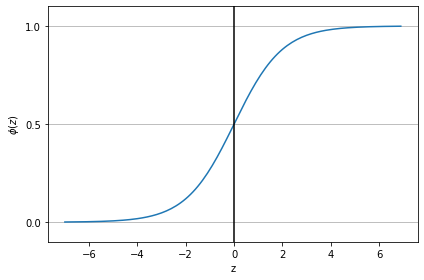

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show() 

In [25]:
lr = LogisticRegression(C=7500.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train_std, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression(C=7500.0, multi_class='ovr', random_state=1)

In [17]:
lr.predict_proba(x_test_std[:3, :])

array([[9.99249774e-01, 8.69663751e-09, 8.69216036e-10, 5.14190608e-15,
        2.19164974e-16, 1.09247615e-15, 7.14352184e-18, 8.11521019e-11,
        7.50174834e-04, 7.27683701e-14, 6.00863014e-13, 2.92221331e-11,
        4.10905472e-08, 6.58063444e-25],
       [9.99996301e-01, 2.37217959e-17, 9.95576431e-19, 1.77588327e-26,
        1.92226332e-14, 5.87371917e-14, 5.11941459e-19, 6.30548379e-09,
        3.68282628e-06, 1.29231593e-11, 8.19209400e-11, 1.57675683e-09,
        8.19130052e-09, 1.44862607e-24],
       [1.24245534e-04, 1.94613416e-46, 1.09175469e-29, 5.34306069e-13,
        9.99860050e-01, 5.49301093e-15, 2.58883461e-18, 8.44441436e-13,
        1.52416515e-10, 1.28269394e-34, 1.12441387e-07, 1.55908438e-05,
        6.16719550e-10, 6.37277806e-15]])

In [18]:
lr.predict_proba(x_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [19]:
lr.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([0, 0, 4])

In [20]:
lr.predict(x_test_std[:3, :])

array([0, 0, 5])

In [22]:
lr.predict(x_test_std[0, :].reshape(1, -1))

array([0])

In [23]:
lr.predict(x_test_std)

array([0, 0, 5, ..., 0, 0, 0])

In [24]:
y_test

2805    0
9109    0
8231    5
9785    0
7634    0
       ..
4515    0
458     0
7668    0
5229    0
333     0
Name: Label, Length: 3000, dtype: int64